In [16]:
from transformers import SegformerImageProcessor, SegformerForSemanticSegmentation
from PIL import Image

import torch
import matplotlib.pyplot as plt
import torchvision.transforms as T
import numpy as np
import cv2

In [2]:
id2color = {
    0: (255, 0, 0),      # wall - Red
    1: (0, 255, 0),      # building - Green
    2: (0, 0, 255),      # sky - Blue
    3: (255, 255, 0),    # floor - Yellow
    4: (0, 255, 0),      # tree - Cyan
    5: (255, 0, 255),    # ceiling - Magenta
    6: (192, 192, 192),  # road - Light Gray
    7: (128, 0, 0),      # bed - Maroon
    8: (128, 128, 0),    # windowpane - Olive
    9: (0, 128, 0),      # grass - Dark Green
    10: (128, 0, 128),   # cabinet - Purple
    11: (0, 128, 128),   # sidewalk - Teal
    12: (0, 0, 128),     # person - Navy
    13: (255, 165, 0),   # earth - Orange
    14: (255, 69, 0),    # door - Orange Red
    15: (255, 20, 147),  # table - Deep Pink
    16: (139, 69, 19),   # mountain - Saddle Brown
    17: (154, 205, 50),  # plant - Yellow Green
    18: (186, 85, 211),  # curtain - Medium Orchid
    19: (222, 184, 135), # chair - Burlywood
    20: (60, 179, 113),  # car - Medium Sea Green
    21: (70, 130, 180),  # water - Steel Blue
    22: (75, 0, 130),    # painting - Indigo
    23: (0, 191, 255),   # sofa - Deep Sky Blue
    24: (173, 255, 47),  # shelf - Green Yellow
    25: (105, 105, 105), # house - Dim Gray
    26: (32, 178, 170),  # sea - Light Sea Green
    27: (255, 215, 0),   # mirror - Gold
    28: (47, 79, 79),    # rug - Dark Slate Gray
    29: (0, 206, 209),   # field - Dark Turquoise
    30: (240, 128, 128), # armchair - Light Coral
    31: (205, 92, 92),   # seat - Indian Red
    32: (0, 255, 127),   # fence - Spring Green
    33: (46, 139, 87),   # desk - Sea Green
    34: (0, 100, 0),     # rock - Dark Green
    35: (255, 0, 255),   # wardrobe - Magenta
    36: (128, 128, 128), # lamp - Gray
    37: (72, 61, 139),   # bathtub - Dark Slate Blue
    38: (25, 25, 112),   # railing - Midnight Blue
    39: (240, 230, 140), # cushion - Khaki
    40: (218, 165, 32),  # base - Goldenrod
    41: (199, 21, 133),  # box - Medium Violet Red
    42: (233, 150, 122), # column - Dark Salmon
    43: (128, 128, 0),   # signboard - Olive
    44: (85, 107, 47),   # chest of drawers - Dark Olive Green
    45: (255, 160, 122), # counter - Light Salmon
    46: (222, 184, 135), # sand - Burlywood
    47: (34, 139, 34),   # sink - Forest Green
    48: (218, 112, 214), # skyscraper - Orchid
    49: (255, 105, 180), # fireplace - Hot Pink
    50: (123, 104, 238), # refrigerator - Medium Slate Blue
    51: (255, 222, 173), # grandstand - Navajo White
    52: (255, 248, 220), # path - Cornsilk
    53: (0, 255, 0),     # stairs - Lime
    54: (107, 142, 35),  # runway - Olive Drab
    55: (255, 0, 0),     # case - Red
    56: (72, 209, 204),  # pool table - Medium Turquoise
    57: (128, 0, 128),   # pillow - Purple
    58: (0, 191, 255),   # screen door - Deep Sky Blue
    59: (169, 169, 169), # stairway - Dark Gray
    60: (64, 224, 208),  # river - Turquoise
    61: (255, 218, 185), # bridge - Peach Puff
    62: (135, 206, 250), # bookcase - Light Sky Blue
    63: (240, 128, 128), # blind - Light Coral
    64: (124, 252, 0),   # coffee table - Lawn Green
    65: (0, 255, 255),   # toilet - Aqua
    66: (255, 0, 255),   # flower - Fuchsia
    67: (128, 0, 0),     # book - Maroon
    68: (173, 216, 230), # hill - Light Blue
    69: (255, 255, 240), # bench - Ivory
    70: (255, 239, 213), # countertop - Papaya Whip
    71: (255, 255, 0),   # stove - Yellow
    72: (124, 252, 0),   # palm - Lawn Green
    73: (154, 205, 50),  # kitchen island - Yellow Green
    74: (0, 128, 128),   # computer - Teal
    75: (60, 179, 113),  # swivel chair - Medium Sea Green
    76: (30, 144, 255),  # boat - Dodger Blue
    77: (176, 196, 222), # bar - Light Steel Blue
    78: (255, 140, 0),   # arcade machine - Dark Orange
    79: (220, 20, 60),   # hovel - Crimson
    80: (0, 128, 0),     # bus - Dark Green
    81: (70, 130, 180),  # towel - Steel Blue
    82: (255, 69, 0),    # light - Orange Red
    83: (184, 134, 11),  # truck - Dark Goldenrod
    84: (255, 228, 225), # tower - Misty Rose
    85: (64, 224, 208),  # chandelier - Turquoise
    86: (32, 178, 170),  # awning - Light Sea Green
    87: (255, 250, 205), # streetlight - Lemon Chiffon
    88: (210, 105, 30),  # booth - Chocolate
    89: (128, 0, 128),   # television receiver - Purple
    90: (100, 149, 237), # airplane - Cornflower Blue
    91: (138, 43, 226),  # dirt track - Blue Violet
    92: (95, 158, 160),  # apparel - Cadet Blue
    93: (255, 165, 0),   # pole - Orange
    94: (255, 105, 180), # land - Hot Pink
    95: (0, 255, 127),   # bannister - Spring Green
    96: (127, 255, 212), # escalator - Aquamarine
    97: (210, 180, 140), # ottoman - Tan
    98: (75, 0, 130),    # bottle - Indigo
    99: (220, 220, 220), # buffet - Gainsboro
    100: (255, 0, 255),  # poster - Fuchsia
    101: (240, 230, 140),# stage - Khaki
    102: (0, 255, 0),    # van - Lime
    103: (173, 255, 47), # ship - Green Yellow
    104: (139, 69, 19),  # fountain - Saddle Brown
    105: (255, 255, 0),  # conveyer belt - Yellow
    106: (255, 127, 80), # canopy - Coral
    107: (240, 248, 255),# washer - Alice Blue
    108: (255, 218, 185),# plaything - Peach Puff
    109: (128, 0, 0),    # swimming pool - Maroon
    110: (0, 100, 0),    # stool - Dark Green
    111: (72, 61, 139),  # barrel - Dark Slate Blue
    112: (95, 158, 160), # basket - Cadet Blue
    113: (176, 224, 230),# waterfall - Powder Blue
    114: (0, 255, 255),  # tent - Aqua
    115: (184, 134, 11), # bag - Dark Goldenrod
    116: (30, 144, 255), # minibike - Dodger Blue
    117: (255, 165, 0),  # cradle - Orange
    118: (238, 232, 170),# oven - Pale Goldenrod
    119: (255, 0, 255),  # ball - Fuchsia
    120: (250, 128, 114),# food - Salmon
    121: (210, 105, 30), # step - Chocolate
    122: (112, 128, 144),# tank - Slate Gray
    123: (72, 61, 139),  # trade name - Dark Slate Blue
    124: (240, 248, 255),# microwave - Alice Blue
    125: (250, 128, 114),# pot - Salmon
    126: (255, 140, 0),  # animal - Dark Orange
    127: (173, 216, 230),# bicycle - Light Blue
    128: (255, 218, 185),# lake - Peach Puff
    129: (154, 205, 50), # dishwasher - Yellow Green
    130: (238, 232, 170),# screen - Pale Goldenrod
    131: (222, 184, 135),# blanket - Burlywood
    132: (255, 255, 0),  # sculpture - Yellow
    133: (255, 69, 0),   # hood - Orange Red
    134: (199, 21, 133), # sconce - Medium Violet Red
    135: (176, 224, 230),# vase - Powder Blue
    136: (95, 158, 160), # traffic light - Cadet Blue
    137: (0, 100, 0),    # tray - Dark Green
    138: (47, 79, 79),   # ashcan - Dark Slate Gray
    139: (222, 184, 135),# fan - Burlywood
    140: (255, 215, 0),  # pier - Gold
    141: (0, 255, 127),  # crt screen - Spring Green
    142: (255, 239, 213),# plate - Papaya Whip
    143: (135, 206, 250),# monitor - Light Sky Blue
    144: (255, 228, 225),# bulletin board - Misty Rose
    145: (0, 191, 255),  # shower - Deep Sky Blue
    146: (205, 92, 92),  # radiator - Indian Red
    147: (240, 128, 128),# glass - Light Coral
    148: (240, 230, 140),# clock - Khaki
    149: (50, 205, 50),  # flag - Lime Green
}

In [10]:
processor = SegformerImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

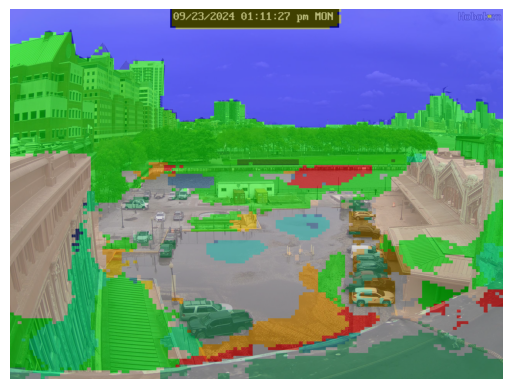

In [15]:
image = Image.open('hoboken.jpg')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

SegMask = torch.argmax(logits, 1)
upsampled_labels = T.functional.resize(SegMask, image.size[::-1], interpolation=T.InterpolationMode.NEAREST)
segmented_image = upsampled_labels[0]
segmented_image_final = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3))

unique_labels = np.unique(segmented_image)
for label in unique_labels:
    if label in id2color:
        # Get the corresponding color for the current label
        color = id2color[label]
        # Assign the color to the corresponding pixels
        segmented_image_final[segmented_image == label] = color


image = np.array(image).astype(np.uint8)
segmented_image_final = segmented_image_final.astype(np.uint8)

alpha = 0.5  # Transparency factor
output = cv2.addWeighted(image, 1 - alpha, segmented_image_final, alpha, 0)
plt.axis('off')
plt.imshow(output)